In [1]:
##必要なライブラリのインポート
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import xgboost as xgb

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#データの読み込み
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

#combineを作ることで学習用データとテストデータを同時に整形する
combine = [train_df, test_df]


In [3]:
#各カラムのタイトルを確認
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [4]:
#学習用データのデータ型、データの欠損の確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#テストデータのデータ型、データの欠損の確認
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [6]:
#数値データの確認
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#オブジェクトデータの確認
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


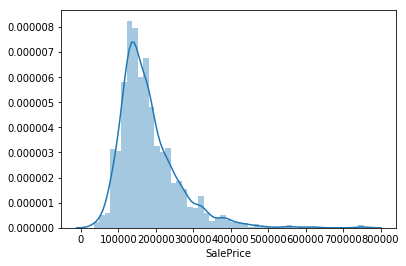

In [9]:
sns.distplot(train_df['SalePrice'])

In [10]:
train_df['SalePrice'].skew()

1.8828757597682129

In [11]:
train_df['SalePrice'].kurt()

6.536281860064529

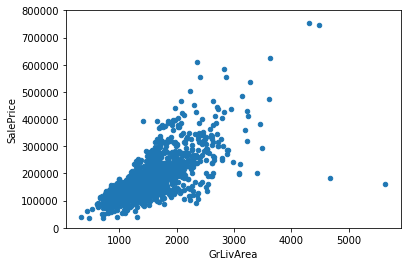

In [12]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

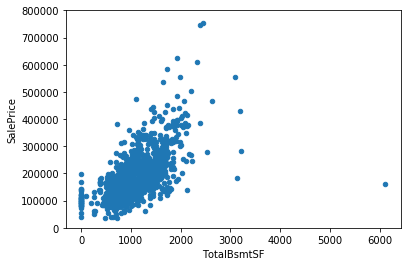

In [13]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

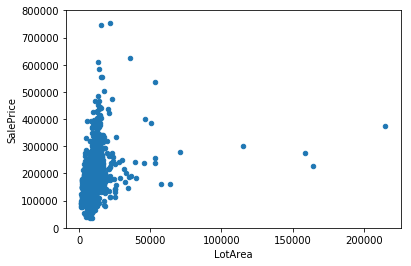

In [14]:
var = 'LotArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

(-0.5, 9.5, 0, 800000)

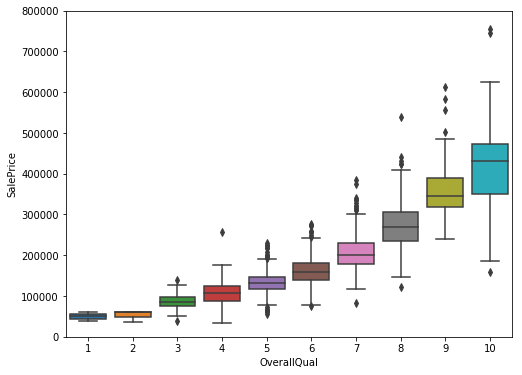

In [15]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data )
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

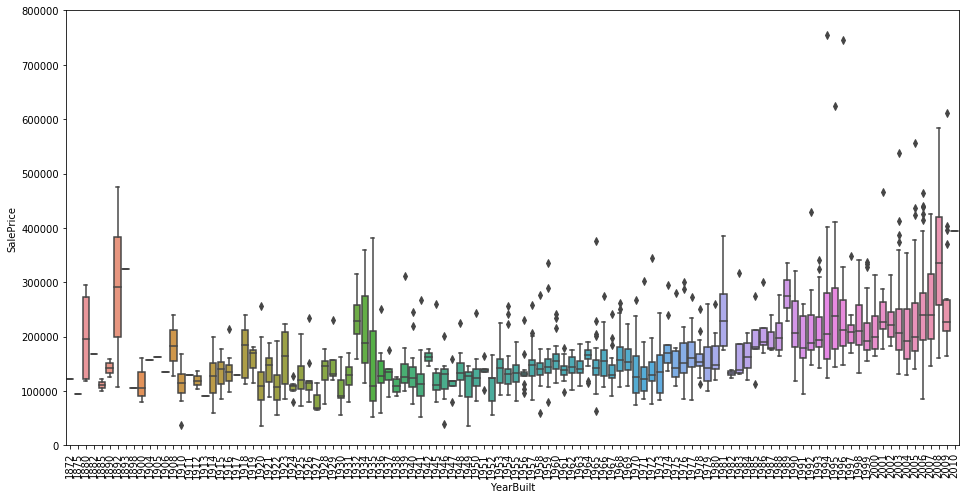

In [16]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data )
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

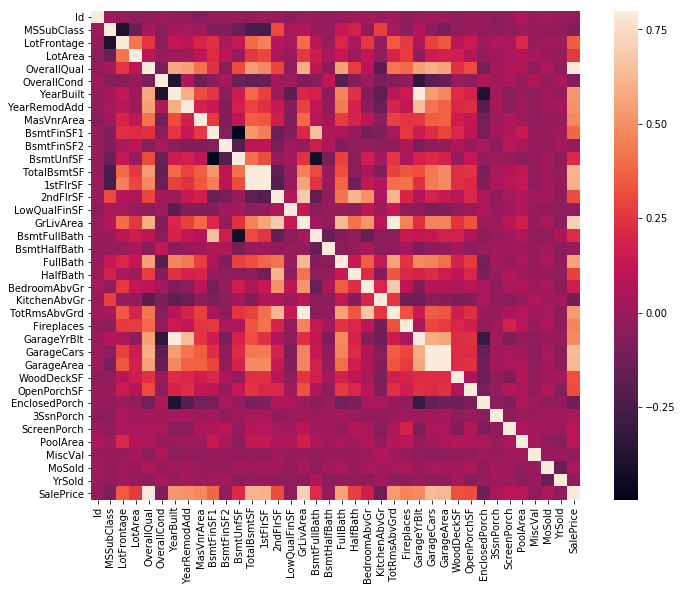

In [17]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

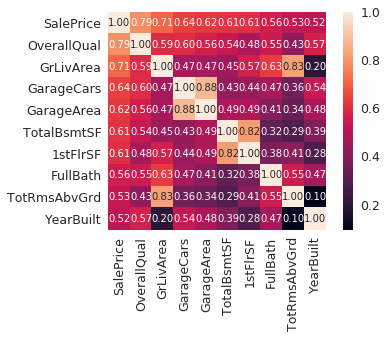

In [18]:
k =10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale =1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':10},\
                yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [19]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

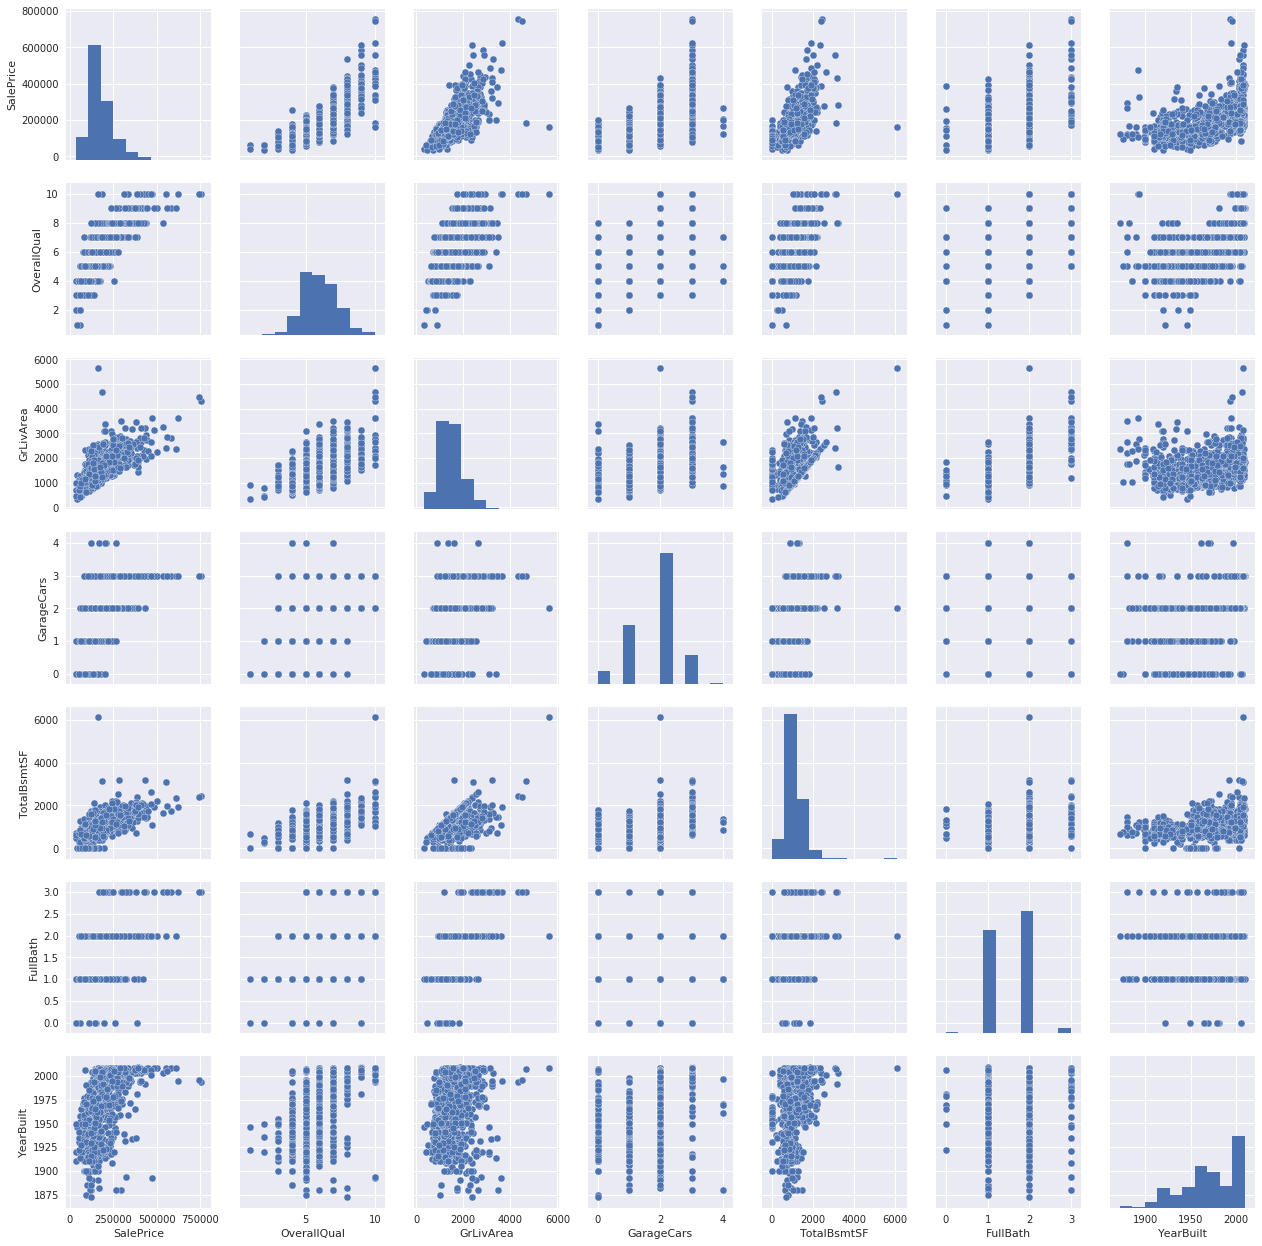

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

In [21]:
all_data = pd.concat((train_df.loc[:, 'MSSubClass':'SaleCondition'],test_df.loc[:, 'MSSubClass':'SaleCondition']))

In [22]:
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [23]:
dropf = missing_data.loc[missing_data['Total']==1].index

In [24]:
all_data.loc[all_data['Electrical'].isnull(),'Electrical'] 

1379    NaN
Name: Electrical, dtype: object

In [25]:
all_data[dropf].describe()

,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,49.582248,441.423235,560.772104,1051.777587,472.874572,1.766621
std,169.205611,455.610826,439.543659,440.766258,215.394815,0.761624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000,793.000000,320.000000,1.000000
50%,0.000000,368.500000,467.000000,989.500000,480.000000,2.000000
75%,0.000000,733.000000,805.500000,1302.000000,576.000000,2.000000
max,1526.000000,5644.000000,2336.000000,6110.000000,1488.000000,5.000000


In [26]:
all_data[dropf].describe(include='O')

,Exterior2nd,Exterior1st,SaleType,Electrical,KitchenQual
count,2918,2918,2918,2918,2918
unique,16,15,9,5,4
top,VinylSd,VinylSd,WD,SBrkr,TA
freq,1014,1025,2525,2671,1492


In [27]:
all_data['Electrical'].dtype

dtype('O')

In [28]:
all_data = all_data.drop((missing_data[missing_data['Total'] > 1]).index, 1)

In [29]:
for f in dropf:
    if all_data[f].dtype == 'O':
        all_data.loc[all_data[f].isnull(),f] = all_data[f].dropna().mode()[0]
    else:
        all_data.loc[all_data[f].isnull(),f] = all_data[f].dropna().median()
    
all_data.isnull().sum().max()

0

In [30]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [31]:
print(all_data.shape)
print(train_df.shape)
print(test_df.shape)

(2919, 56)
(1460, 81)
(1459, 80)


In [32]:
df_train = pd.concat([train_df['Id'],all_data[:train_df.shape[0]]], axis=1)
df_train = pd.concat([df_train,train_df['SalePrice']], axis=1)

In [33]:
df_test = pd.concat([test_df['Id'],all_data[train_df.shape[0]:]], axis=1)

In [34]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
low_range  = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


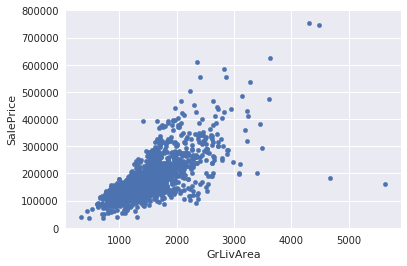

In [35]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

In [36]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,63887,Pave,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,5644.0,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,1,3,1,Ex,12,3,2.0,1418.0,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,40094,Pave,IR1,Bnk,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260.0,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,3,1,3,1,Ex,11,1,3.0,884.0,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [37]:
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

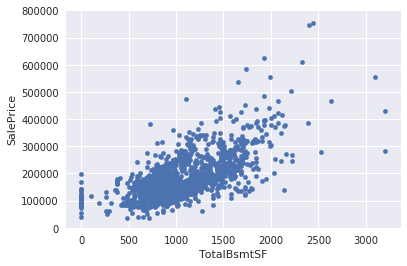

In [38]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

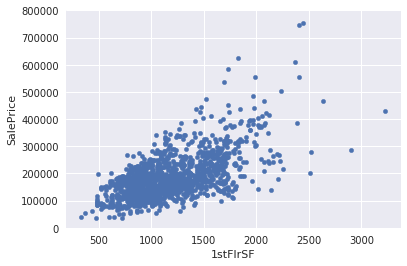

In [39]:
#bivariate analysis saleprice/grlivarea
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

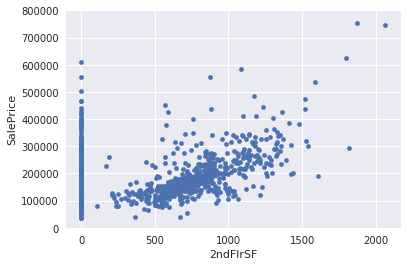

In [40]:
#bivariate analysis saleprice/grlivarea
var = '2ndFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

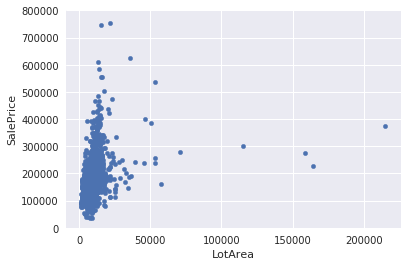

In [41]:
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

In [42]:
df_train.sort_values(by = 'LotArea', ascending = False)[:10]

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,215245,Pave,IR3,Low,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,TA,TA,CBlock,1236.0,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,3,1,TA,8,2,2.0,513.0,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,164660,Grvl,IR1,HLS,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,1249.0,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,3,1,TA,7,2,2.0,529.0,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
249,250,50,159000,Pave,IR2,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,Gd,TA,CBlock,697.0,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,2,0,4,1,Gd,7,2,2.0,389.0,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
706,707,20,115149,Pave,IR2,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,1219.0,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,2,0,2,1,Gd,5,2,2.0,739.0,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000
451,452,20,70761,Pave,IR1,Low,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,TA,TA,CBlock,655.0,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,2,0,2,1,Gd,5,2,2.0,576.0,Y,200,54,0,0,0,0,0,12,2006,WD,Normal,280000
1396,1397,20,57200,Pave,IR1,Bnk,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,353.0,334.0,60.0,747.0,GasA,TA,Y,SBrkr,1687,0,0,1687,1,0,3,1,TA,7,2,2.0,572.0,N,0,0,50,0,0,0,0,6,2010,WD,Normal,160000
769,770,60,53504,Pave,IR2,HLS,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,Ex,TA,PConc,1416.0,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,3,1,4,1,Ex,12,1,3.0,841.0,Y,503,36,0,0,210,0,0,6,2010,WD,Normal,538000
457,458,20,53227,Pave,IR1,Low,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,TA,TA,CBlock,1116.0,0.0,248.0,1364.0,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,2,1,Gd,6,2,2.0,529.0,Y,224,137,0,0,0,0,0,3,2008,WD,Normal,256000
384,385,60,53107,Pave,IR2,Low,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,Gd,TA,PConc,985.0,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1953,2,1,3,1,Gd,9,2,2.0,501.0,Y,216,231,0,0,0,0,0,6,2007,WD,Normal,240000
53,54,20,50271,Pave,IR1,Low,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,Gd,TA,CBlock,1810.0,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842,0,0,1842,0,1,0,1,Gd,5,1,3.0,894.0,Y,857,72,0,0,0,0,0,11,2006,WD,Normal,385000


In [43]:
#df_train = df_train.drop(df_train[df_train['LotArea']>50000].index)
#df_train = df_train.drop(df_train[df_train['TotalBsmtSF']>2500].index)
#df_train = df_train.drop(df_train[df_train['1stFlrSF']>2500].index)

In [44]:
df_train[df_train['TotalBsmtSF']>df_train['1stFlrSF']].shape

(30, 58)

In [45]:
df_train.shape

(1441, 58)

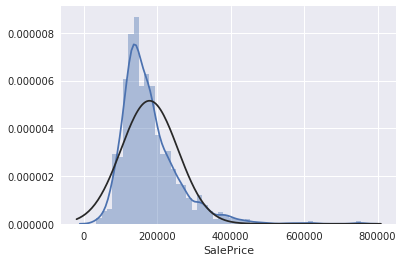

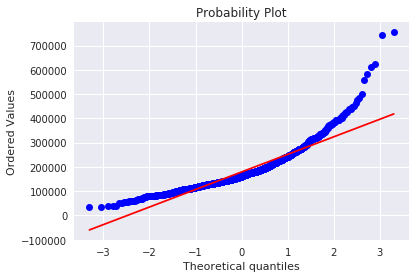

In [46]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [47]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

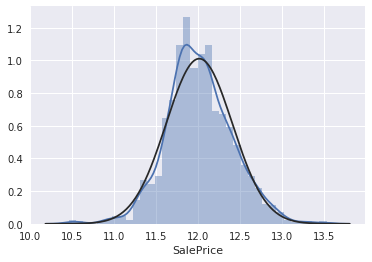

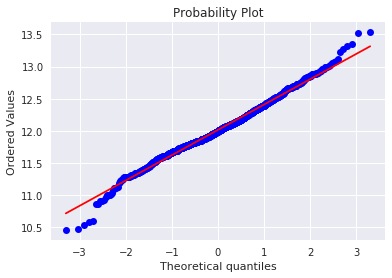

In [48]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

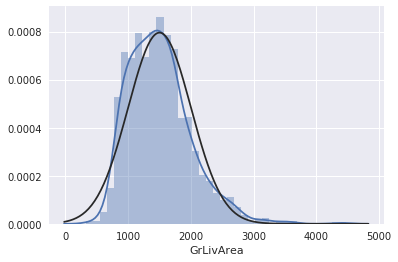

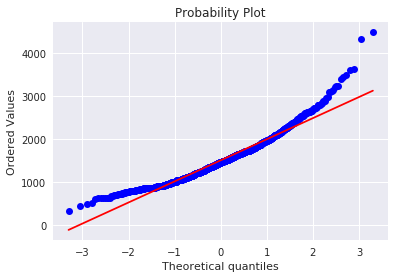

In [49]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [50]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

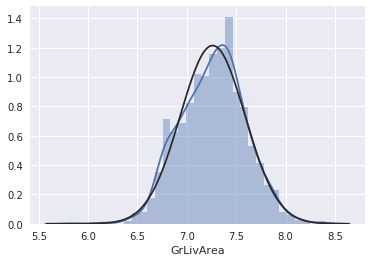

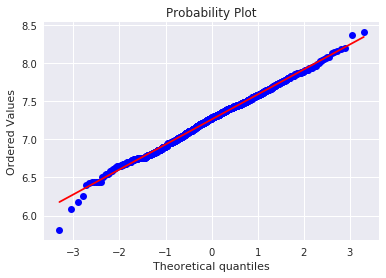

In [51]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

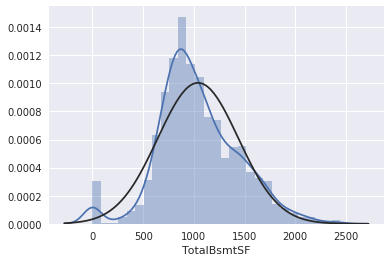

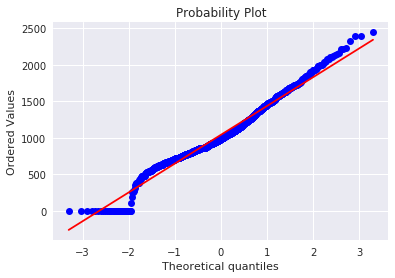

In [52]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [53]:
df_train.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,7.444249,2,1,3,1,Gd,8,0,2.0,548.0,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978.0,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,2,0,3,1,TA,6,1,2.0,460.0,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486.0,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,7.487734,2,1,3,1,Gd,6,1,2.0,608.0,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216.0,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,3,1,Gd,7,1,3.0,642.0,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655.0,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,2,1,4,1,Gd,9,1,3.0,836.0,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [54]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [55]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

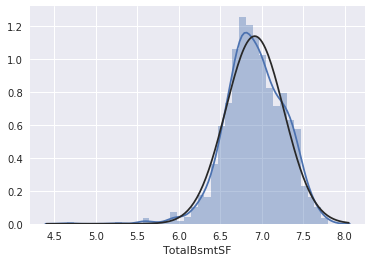

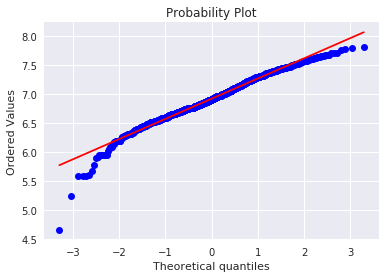

In [56]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

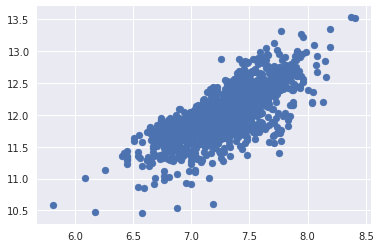

In [57]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

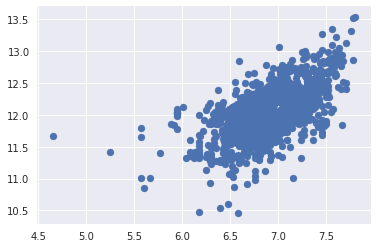

In [58]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [59]:
all_data = pd.concat([df_train.drop(['Id','SalePrice'], axis = 1),df_test.drop(['Id'], axis = 1)])

In [62]:
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [67]:
all_data['Neighborhood+Exterior1st'] = all_data['Neighborhood'] + '+'+ all_data['Exterior1st']
#all_data['MSZoning+CentralAir'] = all_data['MSZoning'] + '+'+ all_data['CentralAir']
#all_data['OverallCond+BsmtExposure'] = all_data['OverallCond'] + '+'+ all_data['BsmtExposure']
all_data['Foundation+SaleCondition'] = all_data['Foundation'] + '+'+ all_data['SaleCondition']
#all_data['Neighborhood+BsmtExposure'] = all_data['Neighborhood'] + '+'+ all_data['BsmtExposure']
#all_data['Neighborhood+GarageFinish'] = all_data['Neighborhood'] + '+'+ all_data['GarageFinish']
all_data['Neighborhood+SaleCondition'] = all_data['Neighborhood'] + '+'+ all_data['SaleCondition']
all_data['Neighborhood+OverallCond'] = all_data['Neighborhood'] + '+'+ all_data['OverallCond']
all_data['KitchenQual+SaleCondition'] = all_data['KitchenQual'] + '+'+ all_data['SaleCondition']
#all_data['Exterior1st+BsmtFinType1'] = all_data['Exterior1st'] + '+'+ all_data['BsmtFinType1']

In [68]:
#convert categorical variable into dummy
all_data = pd.get_dummies(all_data)

In [69]:
df_train_tmp = pd.concat([df_train['Id'],all_data[:df_train.shape[0]]], axis=1)
df_train = pd.concat([df_train_tmp,df_train['SalePrice']], axis=1)

In [70]:
df_train.head()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasBsmt,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,...,Neighborhood+OverallCond_Mitchel+2,Neighborhood+OverallCond_Mitchel+3,Neighborhood+OverallCond_Mitchel+4,Neighborhood+OverallCond_Mitchel+5,Neighborhood+OverallCond_Mitchel+6,Neighborhood+OverallCond_Mitchel+7,Neighborhood+OverallCond_Mitchel+8,Neighborhood+OverallCond_Mitchel+9,Neighborhood+OverallCond_NAmes+3,Neighborhood+OverallCond_NAmes+4,Neighborhood+OverallCond_NAmes+5,Neighborhood+OverallCond_NAmes+6,Neighborhood+OverallCond_NAmes+7,Neighborhood+OverallCond_NAmes+8,Neighborhood+OverallCond_NAmes+9,Neighborhood+OverallCond_NPkVill+5,Neighborhood+OverallCond_NPkVill+6,Neighborhood+OverallCond_NPkVill+7,Neighborhood+OverallCond_NWAmes+5,Neighborhood+OverallCond_NWAmes+6,Neighborhood+OverallCond_NWAmes+7,Neighborhood+OverallCond_NWAmes+8,Neighborhood+OverallCond_NWAmes+9,Neighborhood+OverallCond_NoRidge+5,Neighborhood+OverallCond_NoRidge+6,Neighborhood+OverallCond_NoRidge+7,Neighborhood+OverallCond_NoRidge+8,Neighborhood+OverallCond_NridgHt+5,Neighborhood+OverallCond_NridgHt+6,Neighborhood+OverallCond_OldTown+1,Neighborhood+OverallCond_OldTown+2,Neighborhood+OverallCond_OldTown+3,Neighborhood+OverallCond_OldTown+4,Neighborhood+OverallCond_OldTown+5,Neighborhood+OverallCond_OldTown+6,Neighborhood+OverallCond_OldTown+7,Neighborhood+OverallCond_OldTown+8,Neighborhood+OverallCond_OldTown+9,Neighborhood+OverallCond_SWISU+1,Neighborhood+OverallCond_SWISU+2,Neighborhood+OverallCond_SWISU+3,Neighborhood+OverallCond_SWISU+4,Neighborhood+OverallCond_SWISU+5,Neighborhood+OverallCond_SWISU+6,Neighborhood+OverallCond_SWISU+7,Neighborhood+OverallCond_SWISU+8,Neighborhood+OverallCond_SWISU+9,Neighborhood+OverallCond_Sawyer+2,Neighborhood+OverallCond_Sawyer+3,Neighborhood+OverallCond_Sawyer+4,Neighborhood+OverallCond_Sawyer+5,Neighborhood+OverallCond_Sawyer+6,Neighborhood+OverallCond_Sawyer+7,Neighborhood+OverallCond_Sawyer+8,Neighborhood+OverallCond_Sawyer+9,Neighborhood+OverallCond_SawyerW+3,Neighborhood+OverallCond_SawyerW+4,Neighborhood+OverallCond_SawyerW+5,Neighborhood+OverallCond_SawyerW+6,Neighborhood+OverallCond_SawyerW+7,Neighborhood+OverallCond_SawyerW+8,Neighborhood+OverallCond_Somerst+5,Neighborhood+OverallCond_Somerst+6,Neighborhood+OverallCond_StoneBr+2,Neighborhood+OverallCond_StoneBr+5,Neighborhood+OverallCond_StoneBr+6,Neighborhood+OverallCond_StoneBr+7,Neighborhood+OverallCond_Timber+4,Neighborhood+OverallCond_Timber+5,Neighborhood+OverallCond_Timber+6,Neighborhood+OverallCond_Timber+7,Neighborhood+OverallCond_Timber+8,Neighborhood+OverallCond_Veen

In [71]:
df_test = pd.concat([df_test['Id'],all_data[df_train.shape[0]:]], axis=1)

In [73]:
X_train = df_train.loc[:, 'LotArea':'KitchenQual+SaleCondition_TA+Partial']
X_test = df_test.loc[:, 'LotArea':'KitchenQual+SaleCondition_TA+Partial']
y_train = df_train['SalePrice']

In [74]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [75]:
model_ridge = Ridge()

In [76]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

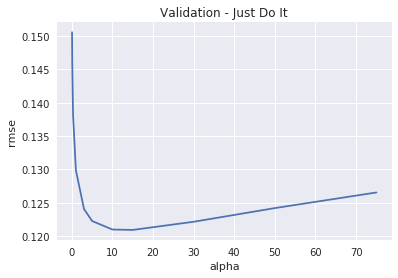

In [77]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [78]:
cv_ridge.min()

0.12093634741105912

In [79]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005, 0.000425, 0.000422, 0.000423]).fit(X_train, y_train)

In [80]:
rmse_cv(model_lasso).mean()

0.119697925858064

In [81]:
model_lasso.alpha_

0.0005

In [82]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [83]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 129 variables and eliminated the other 551 variables


In [84]:
dropf = coef.loc[coef==0].index
print(dropf)

Index(['HasBsmt', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60',
       ...
       'KitchenQual+SaleCondition_Fa+Normal',
       'KitchenQual+SaleCondition_Gd+Abnorml',
       'KitchenQual+SaleCondition_Gd+Alloca',
       'KitchenQual+SaleCondition_Gd+Family',
       'KitchenQual+SaleCondition_Gd+Partial',
       'KitchenQual+SaleCondition_TA+AdjLand',
       'KitchenQual+SaleCondition_TA+Alloca',
       'KitchenQual+SaleCondition_TA+Family',
       'KitchenQual+SaleCondition_TA+Normal',
       'KitchenQual+SaleCondition_TA+Partial'],
      dtype='object', length=551)


In [85]:
X_train = X_train.drop(dropf, axis = 1)
X_test = X_test.drop(dropf, axis = 1)

In [86]:
X_train.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_160,MSSubClass_30,MSSubClass_70,LotShape_IR1,LandContour_HLS,LandContour_Low,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_RRAe,BldgType_1Fam,BldgType_Twnhs,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,OverallQual_10,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_VinylSd,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Heating_Grav,HeatingQC_Ex,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,Neighborhood+Exterior1st_BrkSide+VinylSd,Neighborhood+Exterior1st_MeadowV+CemntBd,Neighborhood+Exterior1st_NAmes+Plywood,Neighborhood+Exterior1st_NWAmes+Plywood,Neighborhood+Exterior1st_NridgHt+VinylSd,Neighborhood+Exterior1st_OldTown+MetalSd,Neighborhood+Exterior1st_SWISU+VinylSd,Foundation+SaleCondition_CBlock+Abnorml,Foundation+SaleCondition_CBlock+Normal,Neighborhood+SaleCondition_ClearCr+Normal,Neighborhood+SaleCondition_Crawfor+Normal,Neighborhood+SaleCondition_Edwards+Normal,Neighborhood+SaleCondition_IDOTRR+Abnorml,Neighborhood+SaleCondition_MeadowV+Normal,Neighborhood+SaleCondition_NridgHt+Partial,Neighborhood+SaleCondition_Somerst+Normal,Neighborhood+OverallCond_Edwards+5,Neighborhood+OverallCond_IDOTRR+4,Neighborhood+OverallCond_IDOTRR+5,Neighborhood+OverallCond_Mitchel+5,Neighborhood+OverallCond_NAmes+5,Neighborhood+OverallCond_NAmes+6,Neighborhood+OverallCond_NoRidge+5,Neighborhood+OverallCond_NridgHt+5,Neighborhood+OverallCond_OldTown+6,Neighborhood+OverallCond_Somerst+5,KitchenQual+SaleCondition_Gd+Normal,KitchenQual+SaleCondition_TA+Abnorml
0,8450,2003,2003,706.0,0.0,150.0,6.752270,856,854,0,7.444249,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9600,1976,1976,978.0,0.0,284.0,7.140453,1262,0,0,7.140453,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11250,2001,2002,486.0,0.0,434.0,6.824374,920,866,0,7.487734,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9550,1915,1970,216.0,0.0,540.0,6.628041,961,756,0,7.448334,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14260,2000,2000,655.0,0.0,490.0,7.043160,1145,1053,0,7.695303,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1

In [87]:
X_train_original = X_train
X_test_original = X_test

In [88]:
#Scaling data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
#from sklearn.decomposition import PCA
#
#pca = PCA(n_components = 180)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [81]:
#X_train = pd.DataFrame(X_train)
#X_tets = pd.DataFrame(X_test)

In [89]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

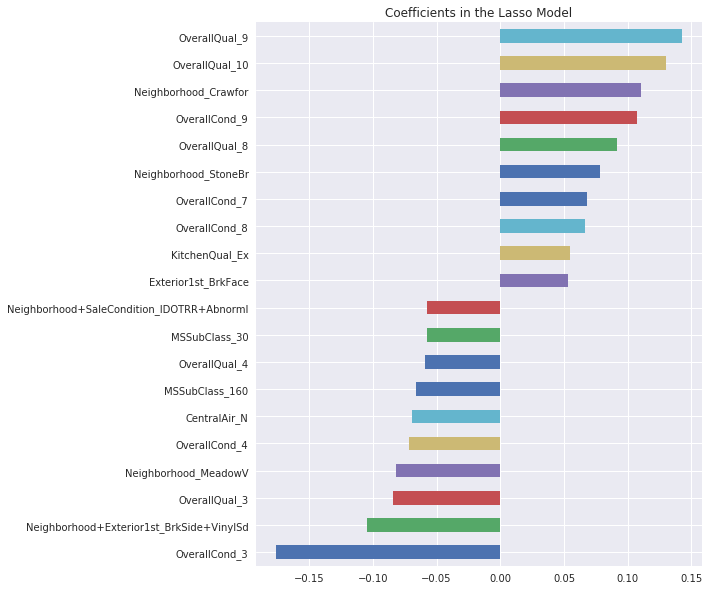

In [90]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [93]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001,  0.0002,  0.0001, 0.0004, 0.0005]).fit(X_train, y_train)
print(model_lasso.alpha_)
print(rmse_cv(model_lasso).mean())

0.0002
0.11365494789021283


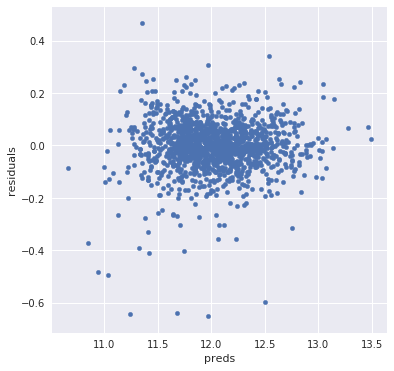

In [92]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [94]:
import xgboost as xgb

In [95]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[01:35:22] /workspace/sr

[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/sr

[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/sr

[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/sr

[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/sr

[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:23] /workspace/sr

[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/sr

[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[01:35:24] /workspace/sr

In [96]:
model.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.373778,0.004960,10.373768,0.011598
1,9.339061,0.004453,9.339050,0.012085
2,8.407883,0.003995,8.407873,0.012522
3,7.569922,0.003581,7.569911,0.012910
4,6.815848,0.003194,6.815817,0.013119


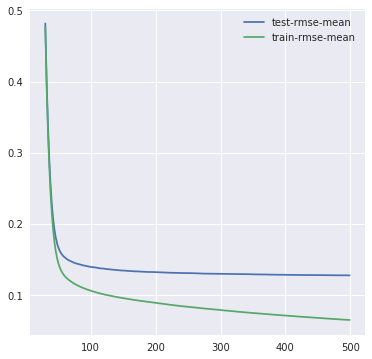

In [97]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [108]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
rmse_cv(model_xgb).mean()

0.12402656172427633

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [101]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

C = [10**i for i in range(0,3)]
epsilon = [10**i for i in range(-4,-1)]
gamma = [10**i for i in range(-5,-2)]

tuned_parameters = {'C':C, 'epsilon':epsilon, 'gamma':gamma}

svr = RandomizedSearchCV(
    SVR(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット
    n_iter = 20, 
    n_jobs = 4,
    cv=4, # 交差検定の回数
    scoring='neg_mean_squared_error') # モデルの評価関数の指定


svr.fit(X_train_sc, y_train)
print(np.sqrt(-svr.best_score_))
print(svr.best_params_)

0.11324734196330705
{'gamma': 0.0001, 'epsilon': 0.001, 'C': 100}


In [102]:
model_svr = SVR(C=100, epsilon=0.001, gamma=0.0001)
model_svr.fit(X_train_sc, y_train)
#rmse_cv(model_svr).mean()

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
xgb_preds = np.exp(model_xgb.predict(X_test))
lasso_preds = np.exp(model_lasso.predict(X_test))
svr_preds = np.exp(model_svr.predict(X_test_sc))

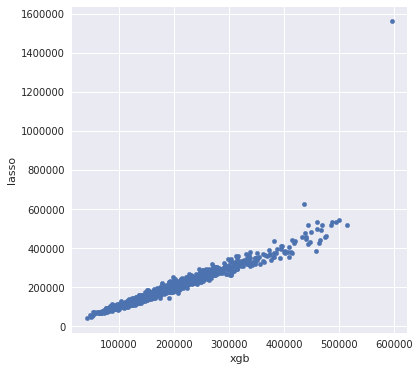

In [104]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

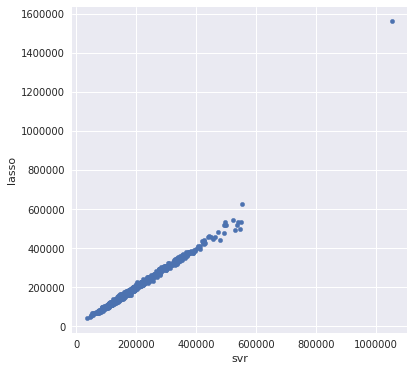

In [105]:
predictions = pd.DataFrame({"svr":svr_preds, "lasso":lasso_preds})
predictions.plot(x = "svr", y = "lasso", kind = "scatter")

In [98]:
#preds = 0.4*lasso_preds + 0.3*xgb_preds + 0.3*svr_preds
#solution = pd.DataFrame({"id":df_test['Id'], "SalePrice":preds})
#solution.to_csv("submission_13.csv", index = False)

In [110]:
preds = 0.3*lasso_preds + 0.2*xgb_preds + 0.5*svr_preds
solution = pd.DataFrame({"id":df_test['Id'], "SalePrice":preds})
solution.to_csv("submission_40.csv", index = False)

In [100]:
#preds = 0.0*lasso_preds + 0.0*xgb_preds + 1.0*svr_preds
#solution = pd.DataFrame({"id":df_test['Id'], "SalePrice":preds})
#solution.to_csv("submission_15.csv", index = False)

In [101]:
#preds = 0.25*lasso_preds + 0.15*xgb_preds + 0.6*svr_preds
#solution = pd.DataFrame({"id":df_test['Id'], "SalePrice":preds})
#solution.to_csv("submission_16.csv", index = False)